In [1]:
%matplotlib inline
import matplotlib as mpl
plt = mpl.pyplot
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
import numpy as np
import utils

In [2]:
training_features, training_labels, validation_features, validation_labels = \
    utils.get_training_data(0.2, onehot=False, standardize=False)
print(training_features.shape, training_labels.shape,
     validation_features.shape, validation_labels.shape)

(16000, 1000) (16000,) (4000, 1000) (4000,)


In [3]:
# Tf-Idf transform
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
training_features = tfidf.fit_transform(training_features)
validation_features = tfidf.transform(validation_features)

In [4]:
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation, Dropout

def create_model(dense=(160,), activation='sigmoid', dropout=0.7):
    model = Sequential()
    for d in dense:
        model.add(Dense(d, input_shape=(1000,)))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(Dropout(dropout))
    model.add(Dense(1))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
class KerasClassifierMod(KerasClassifier):
    def fit(self, x, y, sample_weight, **kwargs):
        return super().fit(x, y, sample_weight=sample_weight, **kwargs)

Using TensorFlow backend.


In [5]:
nn = KerasClassifierMod(build_fn=create_model, epochs=1, batch_size=32, verbose=1)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = 50
learning_rate = 0.1
ada_nn = AdaBoostClassifier(base_estimator=nn, n_estimators=n_estimators, 
                        learning_rate=learning_rate)

In [7]:
ada_nn.fit(training_features, training_labels)

Epoch 1/1
16000/16000 [==============================] - 1s 40us/step
Epoch 1/1
16000/16000 [==============================] - 1s 42us/step
Epoch 1/1
16000/16000 [==============================] - 1s 44us/step
Epoch 1/1
16000/16000 [==============================] - 1s 45us/step
Epoch 1/1
16000/16000 [==============================] - 1s 48us/step
Epoch 1/1
16000/16000 [==============================] - 1s 49us/step
Epoch 1/1
16000/16000 [==============================] - 1s 51us/step
Epoch 1/1
16000/16000 [==============================] - 1s 53us/step
Epoch 1/1
16000/16000 [==============================] - 1s 55us/step
Epoch 1/1
16000/16000 [==============================] - 1s 58us/step
Epoch 1/1
16000/16000 [==============================] - 1s 58us/step
Epoch 1/1
16000/16000 [==============================] - 1s 61us/step
Epoch 1/1
16000/16000 [==============================] - 1s 62us/step
Epoch 1/1
16000/16000 [==============================] - 1s 64us/step
Epoch 1/1
16000/1600

16000/16000 [==============================] - 2s 139us/step


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=<__main__.KerasClassifierMod object at 0x10d6a75f8>,
          learning_rate=0.1, n_estimators=50, random_state=None)

In [19]:
from sklearn.metrics import zero_one_loss
def plot_ada_hist(ada, title='', metric='loss'):
    if metric=='loss':
        metric_fun = lambda x, y: zero_one_loss(x, y)
        label = 'Loss'
    elif metric=='acc':
        metric_fun = lambda x, y: 1-zero_one_loss(x, y)
        label = 'Accuracy'
    else:
        return
    
    ada_acc = np.zeros((n_estimators,))
    for i, pred_labels in enumerate(ada.staged_predict(validation_features)):
        ada_acc[i] = metric_fun(pred_labels, validation_labels)

    ada_acc_train = np.zeros((n_estimators,))
    for i, pred_labels in enumerate(ada.staged_predict(training_features)):
        ada_acc_train[i] = metric_fun(pred_labels, training_labels)

    plt.figure(dpi=300)
    plt.plot(np.arange(n_estimators)+1,
             ada_acc, label='AdaBoost Validation '+label)
    plt.plot(np.arange(n_estimators)+1,
             ada_acc_train, label='AdaBoost Training '+label)
    if metric=='loss':
        plt.semilogy()
    plt.xlabel('Number of iterations')
    plt.ylabel(label)
    plt.xlim(0, ada.n_estimators)
    plt.legend()
    plt.title(title)
    plt.show()
    plt.clf()

16000/16000 [==============================] - 3s 213us/step


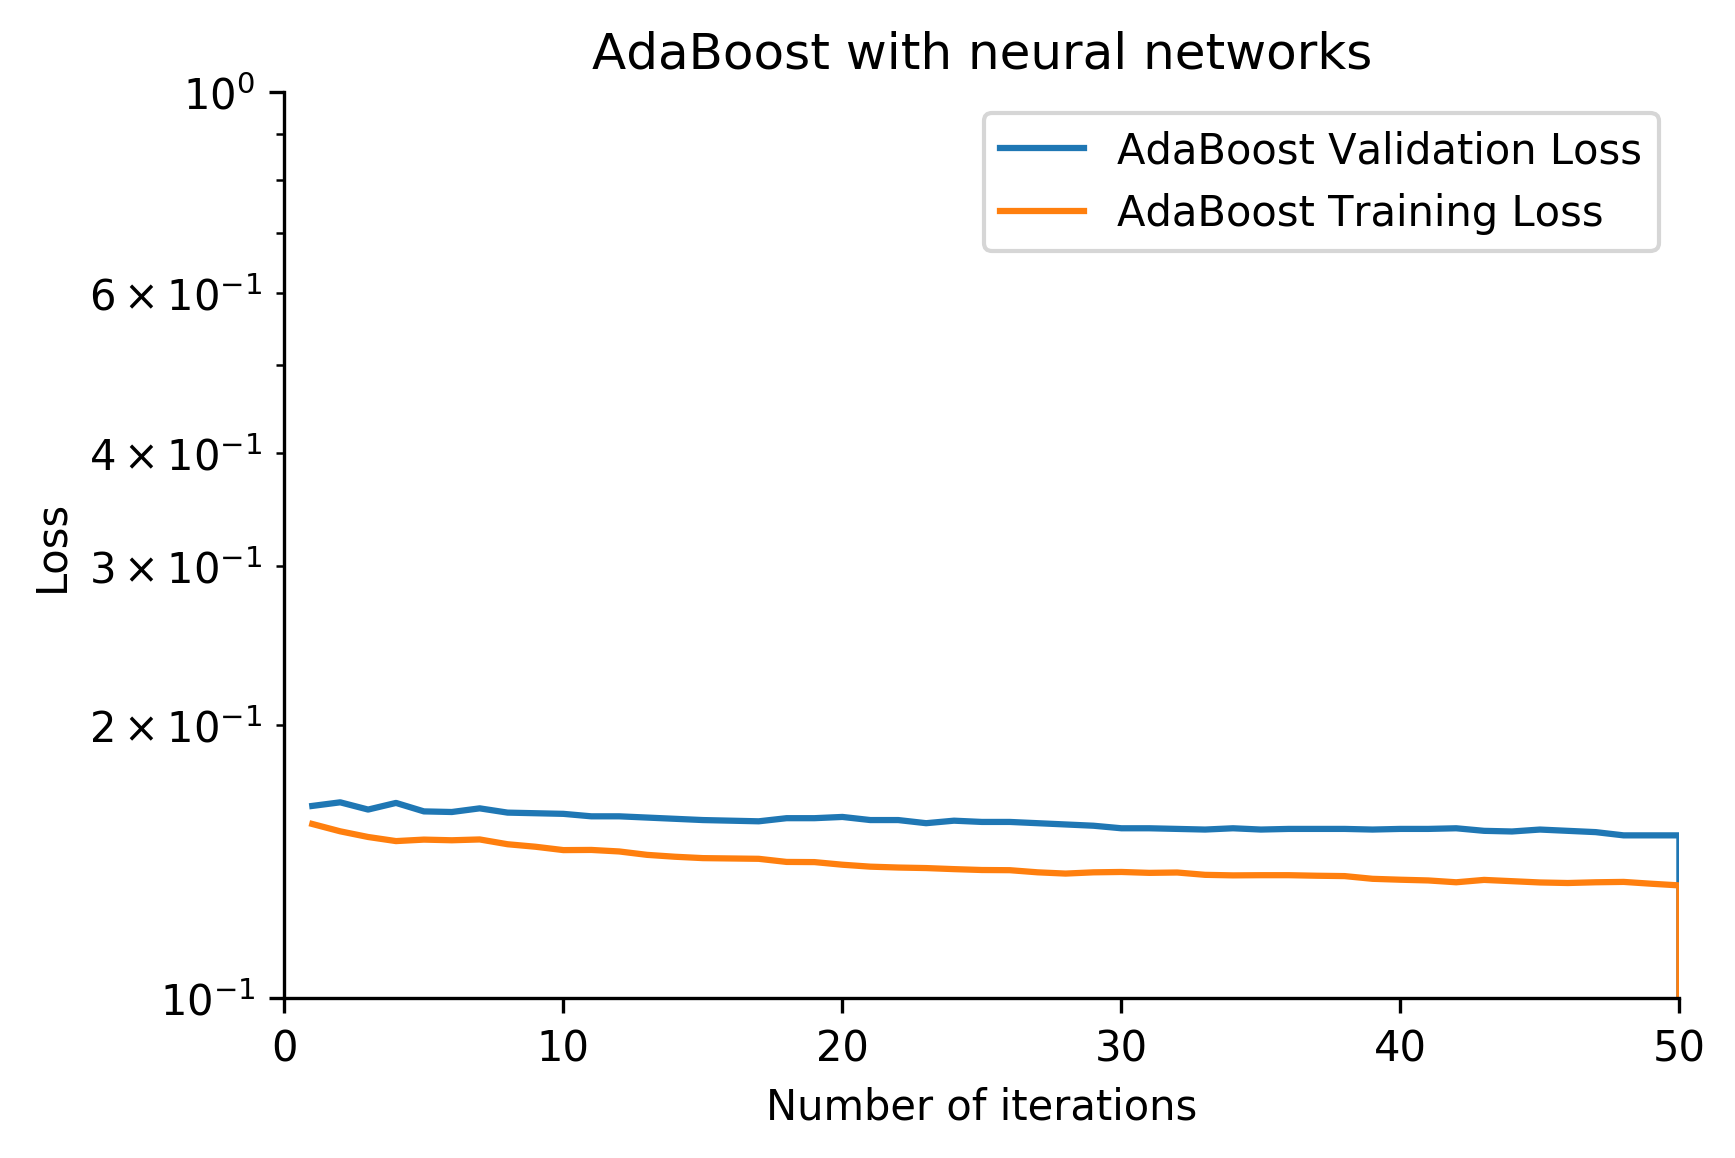

In [20]:
plot_ada_hist(ada_nn, 'AdaBoost with neural networks')

In [22]:
print('The training accuracy is %.4f and validation accuracy is %.4f.'%
     (ada_nn.score(training_features, training_labels),
     ada_nn.score(validation_features, validation_labels)))

4000/4000 [==============================] - 1s 240us/step
The training accuracy is 0.8668 and validation accuracy is 0.8488.


In [10]:
# Now the final training
training_features1, training_labels1, _, _ = \
    utils.get_training_data(0, onehot=False, standardize=False)
print(training_features1.shape, training_labels1.shape)

(20000, 1000) (20000,)


In [11]:
test_features1 = utils.get_test_data(standardize=False)
print(test_features1.shape)

(10000, 1000)


In [12]:
# Tf-Idf transform
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
training_features1 = tfidf.fit_transform(training_features1)
test_features1 = tfidf.transform(test_features1)

In [13]:
nn = KerasClassifierMod(build_fn=create_model, epochs=1, batch_size=32, verbose=1)
from sklearn.ensemble import AdaBoostClassifier
n_estimators = 200
learning_rate = 0.05
ada_nn1 = AdaBoostClassifier(base_estimator=nn, n_estimators=n_estimators, 
                        learning_rate=learning_rate)
ada_nn1.fit(training_features1, training_labels1)

Epoch 1/1
20000/20000 [==============================] - 3s 127us/step
Epoch 1/1
20000/20000 [==============================] - 3s 127us/step
Epoch 1/1
20000/20000 [==============================] - 3s 128us/step
Epoch 1/1
20000/20000 [==============================] - 3s 133us/step
Epoch 1/1
20000/20000 [==============================] - 3s 130us/step
Epoch 1/1
20000/20000 [==============================] - 3s 133us/step
Epoch 1/1
20000/20000 [==============================] - 3s 135us/step
Epoch 1/1
20000/20000 [==============================] - 3s 138us/step
Epoch 1/1
20000/20000 [==============================] - 3s 137us/step
Epoch 1/1
20000/20000 [==============================] - 3s 140us/step
Epoch 1/1
20000/20000 [==============================] - 3s 145us/step
Epoch 1/1
20000/20000 [==============================] - 3s 150us/step
Epoch 1/1
20000/20000 [==============================] - 3s 149us/step
Epoch 1/1
20000/20000 [==============================] - 3s 148us/step
Epoch 

20000/20000 [==============================] - 4s 225us/step
Epoch 1/1
20000/20000 [==============================] - 5s 228us/step
Epoch 1/1
20000/20000 [==============================] - 5s 231us/step
Epoch 1/1
20000/20000 [==============================] - 5s 234us/step
Epoch 1/1
20000/20000 [==============================] - 5s 241us/step
Epoch 1/1
20000/20000 [==============================] - 5s 239us/step
Epoch 1/1
20000/20000 [==============================] - 5s 243us/step
Epoch 1/1
20000/20000 [==============================] - 5s 243us/step
Epoch 1/1
20000/20000 [==============================] - 5s 247us/step
Epoch 1/1
20000/20000 [==============================] - 5s 251us/step
Epoch 1/1
20000/20000 [==============================] - 5s 249us/step
Epoch 1/1
20000/20000 [==============================] - 5s 253us/step
Epoch 1/1
20000/20000 [==============================] - 5s 256us/step
Epoch 1/1
20000/20000 [==============================] - 5s 266us/step
Epoch 1/1
20000/

20000/20000 [==============================] - 7s 346us/step
Epoch 1/1
20000/20000 [==============================] - 7s 351us/step
Epoch 1/1
20000/20000 [==============================] - 7s 355us/step
Epoch 1/1
20000/20000 [==============================] - 7s 362us/step
Epoch 1/1
20000/20000 [==============================] - 7s 360us/step
Epoch 1/1
20000/20000 [==============================] - 7s 368us/step
Epoch 1/1
20000/20000 [==============================] - 7s 366us/step
Epoch 1/1
20000/20000 [==============================] - 7s 370us/step
Epoch 1/1
20000/20000 [==============================] - 7s 374us/step
Epoch 1/1
20000/20000 [==============================] - 7s 373us/step
Epoch 1/1
20000/20000 [==============================] - 8s 380us/step
Epoch 1/1
20000/20000 [==============================] - 8s 380us/step
Epoch 1/1
20000/20000 [==============================] - 8s 379us/step
Epoch 1/1
20000/20000 [==============================] - 8s 385us/step
Epoch 1/1
20000/

20000/20000 [==============================] - 10s 495us/step
Epoch 1/1
20000/20000 [==============================] - 10s 495us/step
Epoch 1/1
20000/20000 [==============================] - 10s 499us/step
Epoch 1/1
20000/20000 [==============================] - 10s 494us/step
Epoch 1/1
20000/20000 [==============================] - 10s 505us/step
Epoch 1/1
20000/20000 [==============================] - 10s 504us/step
Epoch 1/1
20000/20000 [==============================] - 10s 507us/step
Epoch 1/1
20000/20000 [==============================] - 10s 516us/step
Epoch 1/1
20000/20000 [==============================] - 10s 516us/step
Epoch 1/1
20000/20000 [==============================] - 10s 520us/step
Epoch 1/1
20000/20000 [==============================] - 10s 524us/step
Epoch 1/1
20000/20000 [==============================] - 10s 525us/step
Epoch 1/1
20000/20000 [==============================] - 11s 532us/step
Epoch 1/1
20000/20000 [==============================] - 11s 536us/step
Ep

20000/20000 [==============================] - 13s 645us/step
Epoch 1/1
20000/20000 [==============================] - 13s 644us/step
Epoch 1/1
20000/20000 [==============================] - 13s 644us/step
Epoch 1/1
20000/20000 [==============================] - 13s 648us/step


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=<__main__.KerasClassifierMod object at 0x152264f98>,
          learning_rate=0.05, n_estimators=200, random_state=None)

In [14]:
test_labels1 = ada_nn1.predict(test_features1)
utils.save_prediction(test_labels1, 'data/test_labels_ada_nn.txt')

10000/10000 [==============================] - 2s 214us/step


10000/10000 [==============================] - 2s 214us/step


In [15]:
print(ada_nn1.score(training_features1, training_labels1))
# The training accuracy
# For 200 estimators and a learning rate of 0.05 it was 0.86925

20000/20000 [==============================] - 4s 214us/step


20000/20000 [==============================] - 4s 212us/step
0.8692
